In [2]:
import matplotlib.pyplot as plt
import numpy as np


# 1. Linear Systems

## 1.1 Systems of Linear Equations 

This section introduces systems of linear equations, or linear systems, and discusses how to find their solutions.

### Linear Systems

A _linear equation_ in $n$ variables is an equation of the form:

$$
a_1 x_1 + a_2 x_2 + \dots + a_n x_n = b
$$

where $x_1, x_2, \dots, x_n$ are variables, and $b$ and the coefficients $a_1, a_2, \dots, a_n$ are real numbers. A _system of linear equations_ is a collection of linear equations in the same set of variables. For example, a system of $m$ equations in $n$ variables $x_1, x_2, \dots, x_n$ can be represented as:

\begin{align}
a_{11} x_1 + a_{12} x_2 + \dots + a_{1n} x_n &= b_1 \\
a_{21} x_1 + a_{22} x_2 + \dots + a_{2n} x_n &= b_2 \\
&\vdots \\
a_{n1} x_1 + a_{n2} x_2 + \dots + a_{nn} x_n &= b_n \\
\end{align}

A _solution_ for a linear system is a list of real numbers $(s_1, s_2, \dots, s_n)$ that satisfy each equation in the system. Two linear systems are said to be equivalent if they have the same set of solutions. In other words, every solution of the first system is also a solution of the second system, and vice versa. Furthermore, a linear system is called __consistent__ if it has solutions; otherwise, it is called __inconsistent__. It turns out that any linear system has either no solutions, exactly one solution, or infinitely many solutions.

As an example, let's consider a simple case where we have two equations in two unknowns. Finding the solution of such a system is easy as it comes down to finding the intersection of two lines in the plane. More precisely, the graph of each equation in this system represents a line, and a point $(s_1, s_2) \in \mathbb{R}^2$ is a solution if and only if it lies on both lines.


```{admonition} Example 1
The following system is consistent, and its only solution is $(0, -1)$.

$$
\begin{align*}
2x_1 - x_2 &= 1 \\
x_1 - 2x_2 &= 2 \\
\end{align*}
$$

```

The following cell plots the graph of these lines on the same plane:

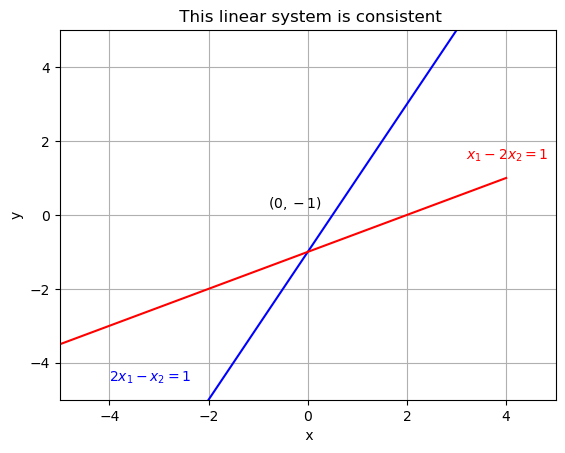

In [2]:
# Data for plotting

x = range(-5, 5)
y1 = [ 2*k-1 for k in x]
y2 = [ (k-2)/2 for k in x]

fig, ax = plt.subplots()

# Specify the length of each axis
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

#Plot x and y1 using blue color
ax.plot(x, y1, color = 'b')
ax.text(-4,-4.5,'$2x_1 - x_2 = 1$', color = 'b')

#Plot x and y2 using red color
ax.plot(x, y2, color = 'r')
ax.text(3.2,1.5,'$x_1 -2x_2 = 1$', color = 'r')

# add label to the intersection
ax.text(-0.8, 0.2, '$(0,-1) $' )

# Add labels and a title to the graph
ax.set(xlabel=' x', ylabel='y',
       title=' This linear system is consistent')
ax.grid()

plt.show()


(2) The next system is inconsistent because it does not have any solutions.

\begin{align*}
    2x_1 - x_2 &= 1 \\ 
    4x_1 - 2x_2 &= 7 \\ 
\end{align*}


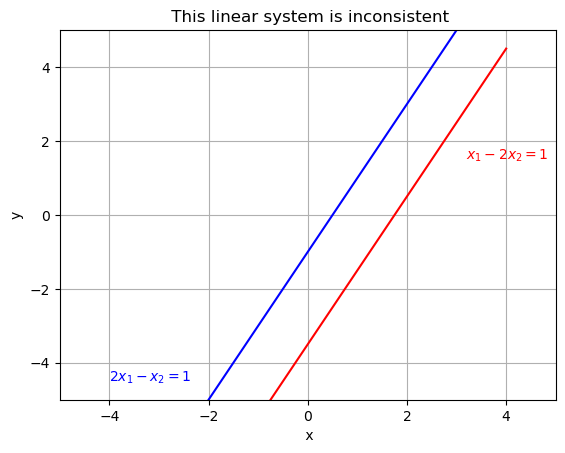

In [3]:

import matplotlib.pyplot as plt

# Data for plotting

x = range(-5, 5)
y1 = [ 2*k-1 for k in x]
y2 = [ 2*k-7/2 for k in x]

fig, ax = plt.subplots()

# Specify the length of each axis
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)

#Plot x and y1 using blue color
ax.plot(x, y1, color = 'b')
ax.text(-4,-4.5,'$2x_1 - x_2 = 1$', color = 'b')

#Plot x and y2 using red color
ax.plot(x, y2, color = 'r')
ax.text(3.2,1.5,'$x_1 -2x_2 = 1$', color = 'r')



# Add labels and a title to the graph
ax.set(xlabel=' x', ylabel='y',
       title=' This linear system is inconsistent')
ax.grid()

plt.show()



Similarly, we can find a linear system containing two equations in two unknowns that has infinitely many solutions ( see Excercies 1).

## Solving a Linear System

A fundamental question about a linear system is whether or not it is consistent and, if it is, whether it has a unique solution or infinitely many solutions. To that end, we utilize the __row reduction algorithm__. The main idea is to use a set of operations called _elementary row operations_ to convert a system into an equivalent system that is easier to solve. These elementary row operations are:

1. Swapping two equations.
2. Multiplying an equation by a nonzero number.
3. Adding a multiple of one equation to another equation.

To do this, we first represent the essential information of a system in a compact rectangular form called the augmented matrix of the system. For example, the augmented matrix of the system:

$$
\begin{align*}
x + 2y + 3z &= 9 \\
2x - y + z &= 8 \\
3x - z &= 3 
\end{align*}
$$

is the following matrix:

$$
\begin{bmatrix} 1 & 2 & 3 & 9 \\ 2 & -1 & 1 & 8 \\ 3 & 0 & -1 & 3 \end{bmatrix}
$$

In the augmented matrix, each row represents an equation in the system. We can define the same operations for matrices, by simply replacing "equation" with "row" in their definitions. Moreover, we say that two matrices A and B are __row equivalent__ if one can be transformed into the other using the elementary row operations mentioned above.

The goal is to convert the augmented matrix to another matrix form that is easier to solve. This easier form is called __echelon form__. This new matrix form corresponds to a linear system that is simpler to deal with and is equivalent to the original system.

To formally define the echelon form, we need to introduce the following concepts:

__Zero Row__: a row containing only zero entries.

__Leading Entry__: the leftmost nonzero entry in a nonzero row.

A rectangular matrix is in row echelon form (REF) if:

1. All non-zero rows are above any zero row.
2. Every leading term of a row is in a column to the right of the leading entry.
3. Entries below a leading entry are zero.

A rectangular matrix is in __reduced row echelon form__ (RREF) if:

1. It is in echelon form.
2. Every leading entry is 1.
3. Entries above a leading entry are zero.


```{admonition} Example 2


The following matrix is in REF. The leading entries ($\blacksquare$) can be any nonzero real numbers, while the ($*$s) may be any real number.

$$
\begin{bmatrix} 0 & \blacksquare & * & * & * & * & & * \\ 0 & 0 & \blacksquare & * & * & * & & * \\ 0 & 0 & 0 & 0 & \blacksquare & * && *\\  0 & 0 & 0 & 0 & 0 & \blacksquare & & * \\0 & 0 & 0 & 0 & 0 &  0 & & \blacksquare\end{bmatrix}
$$

The following matrix is in RREF:

$$
\begin{bmatrix} 0 & 1 & 0 & * & 0 & & * \\ 0 & 0 & 1 & * & 0 & & * \\ 0 & 0 & 0 & 0 & 1 & & *\\ 0 & 0 & 0 & 0 & 0 & & 0\end{bmatrix}
$$


```

`````{admonition} Theorem 1
:class: tip

Any nonzero matrix is row equivalent to one and only one matrix in RREF.

`````

__Reduction Algorithm:__

The reduction algorithm takes in a matrix and produces a matrix in RREF. It consists of 5 steps; in step four, it produces a matrix in REF, and in the fifth step, RREF. We will show the algorithm with an example:


```{admonition} Example 3
Find the RREF of

$$
A = \begin{bmatrix} 0 & 2 & 3 & & 9\\ 2 & -1 & 1 & & 8 \\ 3 & 0 & -1 & & 3\end{bmatrix}
$$


```


We represent a matrix as a numpy array


In [4]:
#numpy array to represent a matrix: each row is a list.
A = np.array([[0,2,3,9],[2,-1,1,8],[3,0,-1,3]])
A


array([[ 0,  2,  3,  9],
       [ 2, -1,  1,  8],
       [ 3,  0, -1,  3]])

Lets write Pythons functions that perform the row operations:

In [5]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix = np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing row 1 by the sum of itself and a multiple of row2 

def replace(matrix, row1, row2, scalar):
    copy_matrix = np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1] + scalar * matrix[row2] 
    return copy_matrix



__Step 1__: Start with the leftmost nonzero entry in the first column and bring it to the top row. This is a pivot column, and the pivot position should be on top.


In [6]:

#the leftmost nonzero column:
A[:,0]


array([0, 2, 3])


__Step 2__: Select a nonzero entry in the pivot column as a pivot. If necessary swap the rows to move this entrty to the top. 


In [7]:

#The first nonzero element is at row 2. Swap the rows 1 and 2:
A1 = swap(A, 0, 1)
A1


array([[ 2., -1.,  1.,  8.],
       [ 0.,  2.,  3.,  9.],
       [ 3.,  0., -1.,  3.]])


__Step 3__: Use scaling operation to make the pivot 1, and replacement operation to create zeros below the leading 1:

In [8]:

#Divide row1 by 2 
A2 = scale(A1, 0, 1/2)
A2

#Replace row3  by row3-3*row1

A3 = replace(A2,2,0,-3)
A3

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  2. ,  3. ,  9. ],
       [ 0. ,  1.5, -2.5, -9. ]])


__Step 4:__ Ignore the row with a pivot position and cover all rows, if any, above it. For the remaining matrix, apply steps 1-3. Repeat the process until there are no more non-zero rows to modify.


In [9]:


#Divide row2 by 2 
A4 = scale(A3, 1, 1/2)
A4

#Replace row3  by row3-3*row1

A5 = replace(A4, 2, 1, -1.5)
A5


array([[  1.  ,  -0.5 ,   0.5 ,   4.  ],
       [  0.  ,   1.  ,   1.5 ,   4.5 ],
       [  0.  ,   0.  ,  -4.75, -15.75]])


We apply the fifth step to get the RREF:



__Step 5__: If a pivot is not one, we use the scaling operation to make it one. Moreover, we create zeros above each pivot starting with the rightmost pivot and working upward and to the left.



In [10]:

#make all entries in pivot positions 1
A6 = scale(A5,2, 1/-4.75)
A6

#replace row1 by row1 + 0.5* row 2
A7 = replace(A6, 0, 1, 0.5)
A7

#replace row1 by row1 - 1.25* row 2
A8 = replace(A7, 0, 2, -1.25)
A8

#replace row2 by row2 - 1.5* row 3
A9 = replace(A8,1,2,-1.5)
A9




array([[ 1.        ,  0.        ,  0.        ,  2.10526316],
       [ 0.        ,  1.        ,  0.        , -0.47368421],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

$A_9$ is the RREF of $A$, and the augmented column (the rightmost column) of $A_9$ is the solution to the original system.

```{admonition} Example 4
Find the solution set of the following system of equations:

$$
\begin{align*}
2x -5y +z &= 2 \\
x -y &= 4 \\
3x-z &= 3 
\end{align*} 
$$


````


__Solution__: Let's setup the augmented matrix of the system and then convert it to its RREF:

In [11]:

#The augmented matrix
R = np.array([[2,-5, 1, 2], [1,-1,0,4], [3,0,-1,3]])
R

#finding the first pivot entry: 1
R1= swap(R, 1, 0)
R1

#making entries below 1 zero
R2 = replace(R1, 1, 0, -2)
R2

R3 = replace(R2, 2,0, -3)
R3

#making entries below the second pivot entry (-3) zero
R4 = replace(R3, 2, 1, 1)
R4


array([[  1.,  -1.,   0.,   4.],
       [  0.,  -3.,   1.,  -6.],
       [  0.,   0.,   0., -15.]])


R4 is in REF. Now we write back the corresponding linear system:


$$
\begin{align*}
x + y &= 4 \\
-3y + z &= -6 \\
0 &= -15 
\end{align*} 
$$


The last equation is impossible, which means the system is inconsistent.


#### Exercises

```{admonition} Exercises

1. Find a linear system containing two equations in two unknowns that has infinitely many solutions. Verify your answer by plotting the lines of these equations on the same plane.



2. Find a linear system that is equivalent to the linear system in Example 1.


3. Determine which of the following matrices are in REF. For those that are, identify their pivot columns. Are any in RREF?


$A = \begin{bmatrix} 0 & 0 & 4 &-1 && 0\\ 0 & 0 & 0 &0 && 0 \\ 0 & 0& 0 & 0 &&3\end{bmatrix}$


$B = \begin{bmatrix} 1 & 1 & 0 && 1\\  0 & 1 & 1 &&0\\ 0 & 0 & 1 &&1 \end{bmatrix}$

$C = \begin{bmatrix} 1 & 0 & 3 && 0\\  0 & 1 & 0 &&0\\ 0 & 0 & 0 &&1 \end{bmatrix}$


4. For the above matrices write the coresponding linear systems and find their solutions. 

5. Find the REF of $D = \begin{bmatrix} 0 & 1 & 2\\ 1 & 0 & 3\\ 4 & -3 & 8 \end{bmatrix}$.



```

## 1.2. Matrix Equation.



```{note}
Linear systems can be represented by equations involving vectors and matrices. In this section we use such representations to study and analyze linear systems.
```

Let $n$ be a positive integer, and $\mathbb{R}^n$ be the collection of all ordered $n$-tuples of real numbers. An element of $\mathbb{R}^n$, denoted by an $n\times 1$ __column matrix__, and is called a vector. 
For example, 

$$\vec{u} = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix}$$

A vector whose entries are all zero is called __the zero vector__ and is denoted by $\vec{0}$. When there is no risk of confusion we sometimes omit the arrow and use simply $0$ 

Two vectors $\vec{u} = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix}$ and $\vec{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix}$ are __equal__ if their corresponding entries are equal, that is, if $u_i = v_i$ for all $i \leq n$.

Given a vector $\vec{u} = \begin{bmatrix} u_1 \\ u_2 \\ \vdots \\ u_n \end{bmatrix}$ and a real number $c$, the __scalar product__ of $\vec{u}$ by $c$ is given by:

$$c\vec{u} = \begin{bmatrix} cu_1 \\ cu_2 \\ \vdots \\ cu_n \end{bmatrix}$$



`````{admonition} Theorem 2 (properties of sum and scalar product)
:class:tip

Suppose $\vec{u}$, $\vec{v}$, $\vec{w}$ are in $\mathbb{R}^n$, and $c$ and $d$ are real numbers:

1. $\vec{u} + \vec{v} = \vec{v} + \vec{u}$
2. $(\vec{u} + \vec{v}) + \vec{w} = \vec{u} + (\vec{v} + \vec{w})$
3. $\vec{u} + \vec{0} = \vec{0} + \vec{u} = \vec{u}$
4. $\vec{u} + (-\vec{u}) = \vec{0}$
5. $c(\vec{u} + \vec{v}) = c\vec{u} + c\vec{v}$
6. $(c+d)\vec{u} = c\vec{u} + d\vec{u}$
7. $c(d\vec{u}) = (cd)\vec{u}$
`````

### Vector Equation


A vector $\vec{y} \in \mathbb{R}^n$ is called a __linear combination__ of some vectors $\vec{u_1}, \vec{u_2}, \dots, \vec{u_p} \in \mathbb{R}^n$, if there are real numbers $c_1, c_2, \dots, c_p$ such that 

$$ \vec{y} = c_1\vec{u_1} + c_2\vec{u_2} + \dots + c_p\vec{u_p}$$


The __span__ of vectors $\vec{u_1}, \vec{u_2}, \dots, \vec{u_p}$, denoted by $span\ (\vec{u_1}, \vec{u_2}, \dots, \vec{u_p})$, is the set of all possible linear combinations:

$$
span\ (\vec{u_1}, \vec{u_2}, \dots, \vec{u_p})= \{c_1\vec{u_1} + c_2\vec{u_2} + \dots + c_p\vec{u_p}: \,\, c_1,c_2, \dots, c_p \in \mathbb{R}\}
$$

In other words, the span represents all the vectors that can be formed by scaling and adding the given vectors $\vec{u_1}, \vec{u_2}, \dots, \vec{u_p}$.



```{admonition} Example 1

Let $\vec{y}=\begin{bmatrix} 7 \\ -4  \\3 \end{bmatrix}$, $\vec{u}= \begin{bmatrix} 2 \\ -3\\-5 \end{bmatrix}$, and $\vec{v} =\begin{bmatrix} 0 \\ 0  \\1 \end{bmatrix}$.

a. Compute $2 \vec{u} - 3 \vec{v}$.
b. Determine if $\vec{y}$ is a linear combination of $\vec{u}$ and $\vec{v}$.

```



__Solution:__

(a).

$$
2 \vec{u} - 3 \vec{v} = 2 \begin{bmatrix} 2 \\ -3\\-5 \end{bmatrix} - 3 \begin{bmatrix} 0 \\ 0  \\1 \end{bmatrix} = \begin{bmatrix} 4 \\ -6 \\ -10 \end{bmatrix} - \begin{bmatrix} 0 \\ 0  \\3 \end{bmatrix} = \begin{bmatrix} 4 \\ -6 \\ -7 \end{bmatrix}
$$

Let's use Python to double check our solution. A vector is a numpy array of a list.

In [3]:
y = np.array([[7,-4,3]])
print("y = ", y)

u=np.array([[2,-3,-5]])
print("u = ", u)

v=np.array([[0,0,1]])
print("v = ", v)

y =  [[ 7 -4  3]]
u =  [[ 2 -3 -5]]
v =  [[0 0 1]]


In [48]:
#(a). Compute 2u-3v

2*u+3*v

array([[ 4, -6, -7]])

(b). To determine if $\vec{y}$ is a linear combination of $\vec{u}$ and $\vec{v}$, we need to check if there exist real numbers $c_1$ and $c_2$ such that:

$$
\vec{y} = c_1 \vec{u} + c_2 \vec{v}
$$

Substituting the given values, we have:

$$
\begin{bmatrix} 7  \\ -4  \\ 3 \end{bmatrix} = c_1 \begin{bmatrix} 2 \\ -3 \\ -5 \end{bmatrix} + c_2 \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
$$

Which is the same as:

$$\begin{bmatrix} 7 \\ -4  \\3 \end{bmatrix}= \begin{bmatrix} 2x_1 + 0\\ -3c_1 + 0\\-5c_1+c_2 \end{bmatrix}$$

or 

$$
\begin{align*}
 2c_1 &= 7 \\
-3c_1 &= -4 \\
-5c_1+ c_2 &= 3 
\end{align*}
$$



This equation cannot be satisfied because there are no values of $c_1$ and $c_2$ that can make the left-hand side equal to the right-hand side. Therefore, $\vec{y}$ is not a linear combination of $\vec{u}$ and $\vec{v}$.


In Example 1b), to solve a vector equation we converted into a linear system. In general, the vector equation 

$$
x_1\vec{u_1} + x_2\vec{u_1}+ \dots + x_p\vec{u_p} = \vec{y}
$$

has the same solution set as the linear system whose augmented matrix is 

$$
[\vec{u_1}, \vec{u_2}, \dots, \vec{u_p}| \vec{y}] \quad (*)
$$

Note that for brevity, we represented the augmented matrix by its columns.

 An indexed set of vectors $\{\vec{v_1}, \vec{v_2}, \dots \vec{v_p}\}$ in $\mathbb{R}^n$ is called a __linearly independet__ set if the vector equation:

$$ x_1 \vec{v_1} + x_2 \vec{v_2} + \dots + x_p \vec{v_p} = 0$$

has only the trivial solution. The set is called __linearly dependent__ if there are real numbers $c_1,c_2, \dots c_p$, not all zero, such that 

$$ c_1 \vec{v_1} + c_2 \vec{v_2} + \dots + c_p \vec{v_p} = 0$$


`````{admonition} Theorem 3
:class: tip


1. A set of vectors containing the zero vector is linearly dependent.

2. A set of two vectors is linearly dependent if and only if one is a multiple of the other.

`````

```{admonition} Example 2

Determine if the following vectors form a linearly independent set:

$$
\vec{u} = \begin{bmatrix} 1\\2\\3 \end{bmatrix} \,\,  \vec{v} = \begin{bmatrix} 4\\5\\6 \end{bmatrix}, \,\,  \vec{w} = \begin{bmatrix} 7\\8\\9 \end{bmatrix}
$$

```

__Solution:__

We convert the augmented matrix in $(*)$ into its REF:

In [5]:
A = np.array([[1,4,7, 0], [2,5,8,0], [3,6,9,0]])
A

array([[1, 4, 7, 0],
       [2, 5, 8, 0],
       [3, 6, 9, 0]])

In [6]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row1 by the sum of itself and a multiple of row2 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [7]:
A1 = replace(A, 1, 0, -2)
A1

array([[ 1.,  4.,  7.,  0.],
       [ 0., -3., -6.,  0.],
       [ 3.,  6.,  9.,  0.]])

In [8]:
A2 = replace(A1, 2, 0, -3)
A2

array([[  1.,   4.,   7.,   0.],
       [  0.,  -3.,  -6.,   0.],
       [  0.,  -6., -12.,   0.]])

In [10]:
A3 = replace(A2, 2, 1, -2)
A3

array([[ 1.,  4.,  7.,  0.],
       [ 0., -3., -6.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [11]:
A4 = scale(A3, 1, -1/3)
A4

array([[ 1.,  4.,  7.,  0.],
       [-0.,  1.,  2., -0.],
       [ 0.,  0.,  0.,  0.]])

Writing this matrix as a linear system, we have

$$ 
\begin{align*}
x+ y + 7z =& 0\\
y +2z =& 0\
\end{align*}
$$

From this, it is clear that $\{\vec{u}, \vec{v}, \vec{w}\}$ is not linearly independent becuase for any nonzero choice of $z$, we get a non-trivial solution. For example, if $z= 1$, then $( -5, -2 , 1)$ is a non-trivial solution.

### Matrix Equation $A\vec{x}=\vec{b}$

Similarly, we can translate a linear system into a matrix equation of the form $A\vec{x} = \vec{b}$. To that end, we need to define the product on the left hand side of equality.

Let A be an $m\times n$ matrix (a rectangular array) with columns $\vec{a_1}, \vec{a_2}, \dots, \vec{a_n}$, and $\vec{x}\in \mathbb{R}^n$. We can define the product of $A$ and $\vec{x}$, denoted by $A\vec{x}$, as the linear combination of the columns of $A$ where the coefficients are the components of $\vec{x}$:


$$A\vec{x}=[\vec{a_1},\  \vec{a_2},\  \dots,\ \vec{a_n}]\, \begin{bmatrix} x_1 \\ x_2\\ \vdots \\ x_n \end{bmatrix}\, := x_1 \vec{a_1} + x_2\vec{a_2} + \dots + x_n \vec{a_n}$$. 


Note that $A\vec{x}$ is defined only if the number of columns of A equals to the numbers entries of $\vec{x}$





`````{admonition} Theorem 4  (properties of the product of A and $\vec{x}$)
:class: tip

        
Suppose $A$ is an $m\times n$ matrix, $\vec{u}$ and $\vec{v}$ are in $\mathbb{R}^n$ and $c$ is a scalar. Then 

1. $A(\vec{u}+ \vec{v})= A \vec{u} + A \vec{v}$
2. $A(c\vec{u})= c A\vec{u}$

        
`````


Now let us discuss how to represent a linear system by a matrix equation. Consider:

$$
\begin{align}
   a_{11} x_1 + a_{12} x_2 +& \dots a_{1n} x_n = \,b_1 \\ 
   a_{21} x_1 + a_{22} x_2 +& \dots a_{2n} x_n = \,b_2 \\ 
    &\vdots\\
   a_{m1} x_1 + a_{n2} x_2 +& \dots a_{mn} x_n = \,b_m \\ 
\end{align}
$$

and let   

$$
A= \begin{bmatrix} a_{11} &  a_{12} &\dots & a_{1n}\\ a_{21} &  a_{22} & \dots & a_{2n}\\ \vdots& \vdots& \vdots  \\  a_{m1}& a_{m2} &\dots &  a_{mn}\\
\end{bmatrix}
$$

and $\ \vec{x}= \begin{bmatrix} x_1 \\ x_2\\ \vdots \\ x_n \end{bmatrix}\ $ and  $\ \vec{b}= \begin{bmatrix} b_1 \\ b_2\\ \vdots \\ b_m \end{bmatrix}\ $. The matrix A is called the __coefficient matrix__. Then we can rewrite the above linear system as: $A\vec{x}=\vec{b}.$

The next theorem discribes when a matrix equation has at least a solution. 


`````{admonition} Theorem 5
:class:tip
        
Let $A$ be an $m\times n$ matrix. The following statements are logically equivalent:


1. For any $\vec{b}\in \mathbb{R}^m$, the equation $A\vec{x}=\vec{b}$ has a solution.
2. Each $\vec{b}\in \mathbb{R}^m$ is a linear combination of columns of $A$
3. The columns of $A$ span $\mathbb{R}^m$
4. A has a pivot poisition in every row. 
`````

```{admonition} Example 3

Let $A$ be a matrix whose columns are $\vec{u}$, $\vec{v}$, $\vec{w}$ from Example 2. Find vectors $\vec{b}, \vec{c} \in \mathbb{R}^3$ such that $A\vec{x}=\vec{b}$ has a solution and $A\vec{x}=\vec{c}$ does not.

```

__Solution:__

Let

$$
A = \begin{bmatrix}
1 & 4 & 7 \\
2 & 5 & 8 \\
3 & 6 & 9 \\
\end{bmatrix},
\quad
\vec{b} = \begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix},
\quad
\vec{c} = \begin{bmatrix}
1 \\
2 \\
4 \\
\end{bmatrix}.
$$

Now, let's form the augmented matrix of equation $A\vec{x}=\vec{b}$:
$$
\begin{bmatrix}
1 & 4 & 7 && 1 \\
2 & 5 & 8 && 2 \\
3 & 6 & 9 && 3 \\
\end{bmatrix}
$$

Now we can perform row operations to verify that it has a solution:

In [16]:
Ab = np.array([[1,4,7,1],[2,5,8,2],[3,6,9,3]])
Ab

array([[1, 4, 7, 1],
       [2, 5, 8, 2],
       [3, 6, 9, 3]])

In [17]:
B1 = replace(Ab, 1 , 0, -2)
B1

array([[ 1.,  4.,  7.,  1.],
       [ 0., -3., -6.,  0.],
       [ 3.,  6.,  9.,  3.]])

In [18]:
B2 = replace(B1, 2 , 0, -3)
B2

array([[  1.,   4.,   7.,   1.],
       [  0.,  -3.,  -6.,   0.],
       [  0.,  -6., -12.,   0.]])

In [19]:
B3 = replace(B2, 2, 1 , -2)
B3

array([[ 1.,  4.,  7.,  1.],
       [ 0., -3., -6.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [20]:
B4 = scale(B3, 1 , -1/3)
B4

array([[ 1.,  4.,  7.,  1.],
       [-0.,  1.,  2., -0.],
       [ 0.,  0.,  0.,  0.]])

From this we see that for any $z \in \mathbb{R}$ we have a unique solution. For example if $z = 0$

$$
\begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix}  1 \\ 0 \\ 0 \end{bmatrix}
$$

So the equation $A\vec{x}=\vec{b}$ has a solution. 


Now, we solve the equation $A\vec{x}=\vec{c}$ to verify that it does not have a solution. Let's form the augmented matrix $[A|\vec{c}]$:

$$
\begin{bmatrix}
1 & 4 & 7 && 1 \\
2 & 5 & 8 && 2 \\
3 & 6 & 9 && 4 \\
\end{bmatrix}
$$

Now we can perform row operations to verify that it does not has a solution

In [21]:
Ac = np.array([[1,4,7,1],[2,5,8,2],[3,6,9,4]])
Ac

array([[1, 4, 7, 1],
       [2, 5, 8, 2],
       [3, 6, 9, 4]])

In [22]:
C1 = replace(Ac, 1 , 0, -2)
C1

array([[ 1.,  4.,  7.,  1.],
       [ 0., -3., -6.,  0.],
       [ 3.,  6.,  9.,  4.]])

In [23]:
C2 = replace(C1, 2 , 0, -3)
C2

array([[  1.,   4.,   7.,   1.],
       [  0.,  -3.,  -6.,   0.],
       [  0.,  -6., -12.,   1.]])

In [24]:
C3 = scale(C2, 1 , -1/3)
C3

array([[  1.,   4.,   7.,   1.],
       [ -0.,   1.,   2.,  -0.],
       [  0.,  -6., -12.,   1.]])

In [25]:
C4 = replace(C3, 2 , 1, 6)
C4

array([[ 1.,  4.,  7.,  1.],
       [-0.,  1.,  2., -0.],
       [ 0.,  0.,  0.,  1.]])

Form this, we can see that the last row corresponds to the equation:

$$
0 = 1
$$

Which is not possible. So $A\vec{x} = \vec{c}$ does not have a solution.

### Exercises:

```{admonition} Exercises
1. Given the system of equations:

$$
\begin{align*}
3x + 2y &= 1 \\
x - 2y + z &= 5 \\
2x - z &= 0
\end{align*}
$$

Write this system as a vector equation and then a matrix equation.
   



2. True or False?

   (a). $\vec{0} \in \text{span} \{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$.
   
   (b). $\vec{v}_1 \in \text{span} \{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$.
   
   (c). $\text{span} \{\vec{v}_1, \vec{v}_2\} \subseteq \text{span} \{\vec{v}_1, \vec{v}_2, \vec{v}_3\}$.
   
   (d). A set 4 vectors must be linearly DEPENDENT in $\mathbb{R}^3$.

```

## 1.3 Solution set of linear Systems.

In this section, we study and analyze the solution set of linear systems.

### Homogenous Linear Systems

We start with describing the solution set of a simpler linear systems where the right side of equalities are zeros. In matrix form, $A\vec{x}=\vec{0}$; such system is called __homogeneous__. Homogeneous systems are always consistent since $\vec{x}=\vec{0}$ is always a solution. We call $\vec{0}$ the trivial solution of $A\vec{x}=\vec{0}$. 

`````{admonition} Theorem 5
:class:tip

The homogenous system $A\vec{x}=\vec{0}$ has a nontrivial solution if and only if it has a non-pivot column. 

Non-pivot columns correspond to __free variables__; all other variables can be expressed in terms of free variables.

`````


```{admonition} Example 1


Describe the solution set of $10x -4y+ 7z=0$

```



__Solution__: consider the augmented matrix of the system: $ \begin{bmatrix} 10& -4& 7&& 0\\ \end{bmatrix}$. There is only one pivot columns and y and z are free variables.



$$
\vec{x} = \begin{bmatrix} x \\ y \\z \end{bmatrix} = \begin{bmatrix} 0.4y - 0.7z \\y\\z \end{bmatrix}= \begin{bmatrix} 0.4y \\ y \\0 \end{bmatrix} + \begin{bmatrix} - 0.7z \\ 0 \\ z \end{bmatrix}= 
y \begin{bmatrix} 0.4 \\ 1 \\ 0\end{bmatrix} + z \begin{bmatrix} 0.7 \\0\\1 \end{bmatrix}
$$

Thus, the solution set is span ( $\ \begin{bmatrix} 0.4 \\ 1 \\ 0\end{bmatrix},\, \begin{bmatrix} 0.7 \\0\\1 \end{bmatrix}\ $)

```{admonition} Example 2

Determine if the following system has a nontrivial solution. Then describe the solution set.

$$
\begin{align*}
3x +5y - 4z &= 0 \\
-3x -2y +4z &= 0 \\
6x + y -8 z &= 0
\end{align*}
$$

```

 
We first setup the augmented matrix, and then, we find its REF:

In [31]:
import numpy as np

A= np.array([[3,5,-4, 0], [-3, -2, 4, 0], [6, 1, -8, 0]])
A

array([[ 3,  5, -4,  0],
       [-3, -2,  4,  0],
       [ 6,  1, -8,  0]])

In [32]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row1 by the sum of itself and a multiple of row2 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [33]:
A_1 = replace(A, 1,0, 1)
A_1

array([[ 3.,  5., -4.,  0.],
       [ 0.,  3.,  0.,  0.],
       [ 6.,  1., -8.,  0.]])

In [34]:
A_2 = replace(A_1, 2,0, -2)
A_2

array([[ 3.,  5., -4.,  0.],
       [ 0.,  3.,  0.,  0.],
       [ 0., -9.,  0.,  0.]])

In [35]:
A_3 = replace(A_2, 2, 1, 3)
A_3

array([[ 3.,  5., -4.,  0.],
       [ 0.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

We can see that the third column is a non-pivot column and therefore $z$ is a free variable. Thus, $A\vec{x}=0$ has (infinitely many) one for each choice of $z$. To find the solution set we write back the linear system coresponding to REF of A: 

$$
\begin{align*}
3x +5y - 4z &= 0 \\
3y &= 0 \\
 0&= 0
\end{align*}
$$

Therefore, $x= \frac{-4}{3}z$, and the slution set contains vectors of the foloowing form:


$$
\vec{x} = \begin{bmatrix} x\\y\\z \end{bmatrix} = \begin{bmatrix} \frac{-4}{3}z\\0\\z \end{bmatrix}= z \begin{bmatrix} \frac{-4}{3}\\0\\1 \end{bmatrix}
$$

for $z\in \mathbb{R}$.

In other words, the solution set is $\text{span}\ (\ \begin{bmatrix} \frac{-4}{3}\\0\\1 \end{bmatrix}\ )$


We can represnt a linear independence equation

$$ x_1 \vec{v_1} + x_2 \vec{v_2} + \dots + x_p \vec{v_p} = 0$$

by a homogenous system $A\vec{x} = 0$ where $A$ is a matrix whose columns are $\vec{v_i}s$. In fact, we have:

`````{admonition} Theorem 6
:class: tip
The columns of a matrix $A$ form a linearly independent set if and only if $A\vec{x}=0$ has only trivial solution.
`````

```{admonition} Example 3

Determine if the columns of the matrix $A = \begin{bmatrix} 2 & 3 & 5\\ -1 & 1 & 1\\ 5 & 4 & 5    \end{bmatrix}$ form a linearly independent set. 
```


__Solution:__

We show $A\vec{x}= 0$ has a nontrivial solution, and therefore, by Theorem 3, the columns of $A$ are linearly indendent. 

In [36]:
A = np.array([[2,3,5,0], [-1,1,1,0], [5, 4, 5,0]])
A

array([[ 2,  3,  5,  0],
       [-1,  1,  1,  0],
       [ 5,  4,  5,  0]])

In [37]:
A1 = swap(A, 1,0) 
A1


array([[-1.,  1.,  1.,  0.],
       [ 2.,  3.,  5.,  0.],
       [ 5.,  4.,  5.,  0.]])

In [38]:
A2 = scale(A1 , 0, -1)
A2

array([[ 1., -1., -1., -0.],
       [ 2.,  3.,  5.,  0.],
       [ 5.,  4.,  5.,  0.]])

In [39]:
A3 = replace(A2, 1,0,-2)
A3

array([[ 1., -1., -1., -0.],
       [ 0.,  5.,  7.,  0.],
       [ 5.,  4.,  5.,  0.]])

In [40]:
A4 = replace(A3, 2,0,-5)
A4

array([[ 1., -1., -1., -0.],
       [ 0.,  5.,  7.,  0.],
       [ 0.,  9., 10.,  0.]])

In [41]:
A5 = scale(A4, 1, 1/5)
A5

array([[ 1. , -1. , -1. , -0. ],
       [ 0. ,  1. ,  1.4,  0. ],
       [ 0. ,  9. , 10. ,  0. ]])

In [42]:
A6 = replace(A5, 2,1, -9)
A6

array([[ 1. , -1. , -1. , -0. ],
       [ 0. ,  1. ,  1.4,  0. ],
       [ 0. ,  0. , -2.6,  0. ]])

Representing this as a linear system, the last row of $A_6$ shows that $z = 0$, and thefore, $y = x= 0$. In other words, the only solution to this system is zero.

### General Case: the solution set of non-homogenoues linear system:

`````{admonition} Theorem 7
:class: tip
Let $A\vec{x}=\vec{b}$ be a consistent system, and let $\vec{p}$ be a solution. Then the solution set of $A\vec{x}=\vec{b}$ is the set of all vectors of the form $\vec{p}+\vec{h}$ where $\vec{h}$ is any solution to the homogenoues system $A\vec{x}=0$.

`````

```{admonition} Example 4
Let $A\vec{x}=\vec{b}$ be a consistent system, and let $\vec{p}$ be a solution. Then the solution set of $A\vec{x}=\vec{b}$ is the set of all vectors of the form $\vec{p}+\vec{h}$ where $\vec{h}$ is any solution to the homogenoues system $A\vec{x}=0$.
```


__Solution__ :

In [43]:
# set up the augemented matrix [A|b]
A = np.array([[3,5,-4,7], [-3,-2, 4,-1], [6,1,-8,-4]])
A

array([[ 3,  5, -4,  7],
       [-3, -2,  4, -1],
       [ 6,  1, -8, -4]])

In [ ]:
# Row reduce the augmented matrix to reduced echelon form:

A1 = replace(A, 1,0,1)
A1

In [ ]:
A2 = replace(A1, 2, 0, -2)
A2

In [ ]:
A3 = replace(A2, 2, 1, 3)
A3

In [44]:
A4 = replace(A3, 0, 1, -5/3)
A4

array([[  1.        ,  -9.33333333, -12.66666667,  -0.        ],
       [  0.        ,   5.        ,   7.        ,   0.        ],
       [  5.        ,   4.        ,   5.        ,   0.        ]])

In [45]:
A5 = scale(A4, 0, 1/3)
A5


array([[ 0.33333333, -3.11111111, -4.22222222, -0.        ],
       [ 0.        ,  5.        ,  7.        ,  0.        ],
       [ 5.        ,  4.        ,  5.        ,  0.        ]])

In [46]:
A6 = scale(A5, 1, 1/3)
A6

array([[ 0.33333333, -3.11111111, -4.22222222, -0.        ],
       [ 0.        ,  1.66666667,  2.33333333,  0.        ],
       [ 5.        ,  4.        ,  5.        ,  0.        ]])

Now we can express each dependent variable in terms of free variables:

We have $x_1 - \frac{4}{3} x_3 = -1$, $x_2= 2$, and $x_3$ is free. As a vector, the general solution of $A\vec{x}=\vec{b}$ is 

$$\begin{bmatrix} x_1 \\ x_2 \\ x_3 \\ \end{bmatrix} = \begin{bmatrix} -1 + \frac{4}{3} x_3\\ 2\\ x_3\end{bmatrix} = \begin{bmatrix} -1 \\ 2 \\ 0 \end{bmatrix} + x_3 \begin{bmatrix} \frac{4}{3} \\ 0 \\ 1 \end{bmatrix}$$

```{admonition} Exercises

1.  Is 

$$
\left\lbrace\ \  \begin{bmatrix} 1 \\ 2  \\3 \end{bmatrix},  
\begin{bmatrix} 4 \\ 5  \\6 \end{bmatrix}, \begin{bmatrix} 7 \\ 8 \\9 \end{bmatrix}\ \ \right\rbrace
$$

linearly independent or dependent?

2. Describe the solution set of $A\vec{x}=\vec{b}$ where 

$$
A = \begin{bmatrix}
1 & 4 & 7 \\
2 & 5 & 8 \\
3 & 6 & 9 \\
\end{bmatrix},
\quad
\vec{b} = \begin{bmatrix}
1 \\
2 \\
3 \\
\end{bmatrix},
$$

```